In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNtarget = pd.read_excel('NN_target.xlsx')
NNtarget.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,RDPNNYRPR/3,0.351,0.0567,[2],0,0.0097,104,0.134,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P61221|ABCE1_HUMAN(pre=R,post=I)",1033722385
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,VVYRPHGR/3,0.242,0.0230,[2],0,0.3340,66,0.112,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q99715|COCA1_HUMAN(pre=R,post=G)",1375227218
2,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,HESGASIK/2,0.283,0.0200,[2],0,-0.0010,66,0.112,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P61978|HNRPK_HUMAN(pre=R,post=I)",487820518
3,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,RRPENPKPQDGK/4,0.877,0.4170,[2],0,-0.0010,6,0.394,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",1068743785
4,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.917,0.5650,[2],0,-0.0020,104,0.140,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",1068740085


In [3]:
NNdecoy = pd.read_excel('NN_decoy.xlsx')
NNdecoy.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PMQHHGAVPGPRGR/4,0.317,0.106,[2],0,0.002,16,0.145,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O94979|SC31A_HUMAN(pre=K,post=V)",1844493795
1,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,FDLHEILVYGYK/3,0.242,0.011,[2],0,-0.001,110,0.110,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q5VWT5|FYB2_HUMAN(pre=K,post=H)",2685883769
2,b1906_293T_proteinID_01A_QE3_122212.01934.01934.3,1,KHSEEHSE/3,0.289,0.034,[2],0,0.327,4,0.229,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P05109|S10A8_HUMAN(pre=K,post=-)",2419891089
3,b1906_293T_proteinID_01A_QE3_122212.01941.01941.2,1,VDLGDDVTHR/2,0.151,0.012,[2],0,0.507,125,0.043,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O75155|CAND2_HUMAN(pre=K,post=K)",1901067338
4,b1906_293T_proteinID_01A_QE3_122212.01942.01942.3,1,IESEVIPIEGLSK/3,0.344,0.010,[2],0,0.005,68,0.156,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P53618|COPB_HUMAN(pre=R,post=K)",2434735228


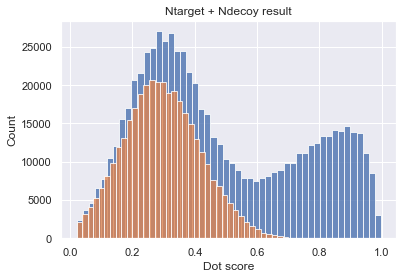

In [4]:
plt.hist(NNtarget['Dot'], bins = 50, alpha = 0.8)
plt.hist(NNdecoy['Dot'], bins = 50, alpha = 0.8)
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('Ntarget + Ndecoy result')
plt.show()

In [5]:
PPtarget = pd.read_excel('PP_target.xlsx')
PPtarget.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,84,0.0949,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q04695|K1C17_HUMAN(pre=R,post=R)",165241441
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0210,[2],0,0.334,35,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9H773|DCTP1_HUMAN(pre=R,post=S)",219973774
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1990,[2],0,-0.002,85,0.0930,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",217882790
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2430,[2],0,-0.003,19,0.1080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97722560
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.4520,[2],0,-0.002,4,0.2180,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97723630


In [6]:
PPdecoy = pd.read_excel('PP_decoy.xlsx')
PPdecoy.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,HSGPFQR/2,0.231,0.089,[2],0,0.004,30,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15006|EMC2_HUMAN(pre=R,post=V)",603411124
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.168,0.043,[2],0,-0.002,5,0.103,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9NSY1|BMP2K_HUMAN(pre=K,post=G)",713157922
2,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PWDDLDLSR/2,0.184,0.022,[2],0,0.495,48,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q99490|AGAP2_HUMAN(pre=R,post=E)",650652258
3,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PERGTSLAHLEMR/4,0.381,0.182,[2],0,0.003,12,0.098,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P40306|PSB10_HUMAN(pre=K,post=V)",562345113
4,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,EERLNETDIHLK/3,0.277,0.074,[2],0,0.001,97,0.074,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q14BN4|SLMAP_HUMAN(pre=R,post=D)",527831030


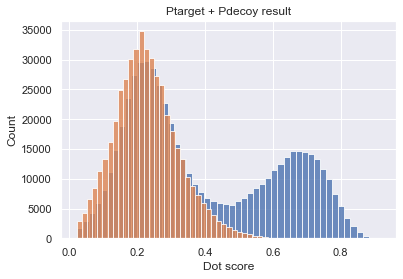

In [7]:
plt.hist(PPtarget['Dot'], bins = 50, alpha = 0.8)
plt.hist(PPdecoy['Dot'], bins = 50, alpha = 0.8)
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('Ptarget + Pdecoy result')
plt.show()

In [8]:
NNtarget.sort_values('Dot') # not necessary

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
610505,b1946_293T_proteinID_10B_QE3_122212.56269.56269.3,1,YDDLPHYGGMDGVGIPSTMYGDPHAAR/3,0.021,0.018,[2],0,0.328,1,0.025,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|O00470|MEIS1_HUMAN(pre=R,post=S)",1399935932
176784,b1927_293T_proteinID_07A_QE3_122212.33969.33969.3,1,SPEGPREEEAAGGEEESPDSSPHGEASR/3,0.021,0.008,[2],0,-0.003,2,0.018,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96NY7|CLIC6_HUMAN(pre=R,post=G)",1143996017
602457,b1946_293T_proteinID_10B_QE3_122212.39276.39276.4,1,ELAHTGDPDLTLSYLSMWLHQPYVESDSR/4,0.021,0.006,[2],0,0.249,2,0.018,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9BW66|CINP_HUMAN(pre=K,post=L)",265452467
452452,b1940_293T_proteinID_04B_QE3_122212.61254.61254.2,1,ALFARPDLLLLDEPTNMLDVR/2,0.021,0.010,[2],0,0.498,2,0.017,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9NUQ8|ABCF3_HUMAN(pre=R,post=A)",56014594
492928,b1942_293T_proteinID_06B_QE3_122212.23458.23458.3,1,NHPDLAGNYDPGASFDVNDQDPDPQPR/3,0.021,0.019,[2],0,0.328,1,0.024,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P09958|FURIN_HUMAN(pre=K,post=Y)",883997980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467465,b1941_293T_proteinID_05B_QE3_122212.29922.29922.2,1,ESYSVYVYK/2,0.997,0.556,[2],0,0.003,144,0.136,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q99880|H2B1L_HUMAN(pre=K,post=V)",311466055
47337,b1922_293T_proteinID_02A_QE3_122212.53206.53206.3,1,IIDVVYNASNNELVR/3,0.997,0.665,[2],0,0.000,104,0.168,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P62241|RS8_HUMAN(pre=R,post=T)",552523333
363865,b1937_293T_proteinID_01B_QE3_122212.56672.56672.2,1,QQLSAEELDAQLDAYNAR/2,0.997,0.826,[2],0,0.002,32,0.080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q86V81|THOC4_HUMAN(pre=K,post=M)",1008786568
90893,b1924_293T_proteinID_04A_QE3_122212.30288.30288.2,1,ESYSVYVYK/2,0.997,0.563,[2],0,0.002,150,0.134,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q99880|H2B1L_HUMAN(pre=K,post=V)",311466055


In [9]:
NNdecoy.sort_values('Dot') # not necessary

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
9832,b1906_293T_proteinID_01A_QE3_122212.47620.47620.3,1,WDEESEEEEKELDSDPYLAVPTHNTDPTK/3,0.021,0.010,[2],0,0.339,2,0.017,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15653|IKBB_HUMAN(pre=R,post=L)",2533439870
246856,b1941_293T_proteinID_05B_QE3_122212.24605.24605.3,1,ESEENDQEEMPIFLGGDEIEEEPQHFLTK/3,0.021,0.020,[2],0,0.332,1,0.023,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q3T8J9|GON4L_HUMAN(pre=R,post=R)",2522037701
237052,b1940_293T_proteinID_04B_QE3_122212.48740.48740.3,1,SLGEDGAEDSFDFASTDNLFLPADDKR/3,0.021,0.005,[2],0,0.331,2,0.019,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O14863|ZNT4_HUMAN(pre=R,post=F)",1978737139
267961,b1942_293T_proteinID_06B_QE3_122212.49920.49920.4,1,NEAEPGSTQPSEPVEEQAPHQGDVEESSRR/4,0.021,0.006,[2],0,0.259,2,0.018,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q6JBY9|CPZIP_HUMAN(pre=R,post=C)",2384456791
190218,b1937_293T_proteinID_01B_QE3_122212.45501.45501.2,1,AEEFDDQEFASSVNDTFEK/2,0.021,0.004,[2],0,0.504,3,0.020,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IWL3|HSC20_HUMAN(pre=K,post=E)",1652345056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197018,b1938_293T_proteinID_02B_QE3_122212.12602.12602.2,1,LFSWVNK/2,0.792,0.253,[2],0,-0.002,120,0.257,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O94979|SC31A_HUMAN(pre=K,post=V)",2257101221
328187,b1946_293T_proteinID_10B_QE3_122212.75500.75500.2,1,YIEELLLR/2,0.814,0.333,[2],0,0.002,82,0.134,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y2P8|RCL1_HUMAN(pre=R,post=G)",2108771731
92260,b1927_293T_proteinID_07A_QE3_122212.27609.27609.2,1,ILQEAFR/2,0.837,0.351,[2],0,0.001,158,0.227,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y3Z3|SAMH1_HUMAN(pre=K,post=V)",1734592633
84889,b1926_293T_proteinID_06A_QE3_122212.60259.60259.2,1,SLIELISK/2,0.890,0.405,[3],0,-0.001,54,0.254,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q13315|ATM_HUMAN(pre=K,post=S)",2424614235


In [30]:
# Ntarget + Ndecoy FDR 1% 구하기

score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNtarget['Dot'] >= score
    nnt = NNtarget[nntarget]
    
    nndecoy = NNdecoy['Dot'] >= score
    nnd = NNdecoy[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.6160000000000004

nnt:  216026
nnd:  2131

FDR:  0.00986455334080157
"""

score:  0.001
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.002
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.003
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.004
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.005
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.006
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.007
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.008
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.009000000000000001
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.010000000000000002
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.011000000000000003
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.012000000000000004
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.013000000000000005
nnt:  673301
nnd:  357069
FDR:  0.5303259611971466


score:  0.014000000000000005
nnt:  673301
nnd:  357069

nnt:  654564
nnd:  338628
FDR:  0.5173336755458595


score:  0.10400000000000008
nnt:  654205
nnd:  338253
FDR:  0.5170443515411836


score:  0.10500000000000008
nnt:  653840
nnd:  337883
FDR:  0.516767098984461


score:  0.10600000000000008
nnt:  653458
nnd:  337506
FDR:  0.5164922611705726


score:  0.10700000000000008
nnt:  653018
nnd:  337146
FDR:  0.5162889843771534


score:  0.10800000000000008
nnt:  652584
nnd:  336761
FDR:  0.516042379218614


score:  0.10900000000000008
nnt:  652181
nnd:  336338
FDR:  0.5157126625890666


score:  0.11000000000000008
nnt:  651778
nnd:  335910
FDR:  0.5153748669025343


score:  0.11100000000000008
nnt:  651365
nnd:  335470
FDR:  0.5150261374191122


score:  0.11200000000000009
nnt:  650897
nnd:  335055
FDR:  0.514758863537549


score:  0.11300000000000009
nnt:  650470
nnd:  334636
FDR:  0.5144526265623318


score:  0.11400000000000009
nnt:  650045
nnd:  334250
FDR:  0.514195171103539


score:  0.11500000000000009
nnt:  649598
nnd:  333821
FDR:  

nnt:  583086
nnd:  270960
FDR:  0.4646998898961731


score:  0.20700000000000016
nnt:  581973
nnd:  270059
FDR:  0.4640404279923639


score:  0.20800000000000016
nnt:  580956
nnd:  269040
FDR:  0.46309875446677545


score:  0.20900000000000016
nnt:  579947
nnd:  268129
FDR:  0.4623336270383328


score:  0.21000000000000016
nnt:  578849
nnd:  267187
FDR:  0.4615832453714181


score:  0.21100000000000016
nnt:  577787
nnd:  266195
FDR:  0.4607147616682272


score:  0.21200000000000016
nnt:  576729
nnd:  265232
FDR:  0.45989017372110647


score:  0.21300000000000016
nnt:  575658
nnd:  264238
FDR:  0.4590190703507986


score:  0.21400000000000016
nnt:  574582
nnd:  263260
FDR:  0.4581765526939584


score:  0.21500000000000016
nnt:  573476
nnd:  262280
FDR:  0.4573513102553551


score:  0.21600000000000016
nnt:  572374
nnd:  261294
FDR:  0.45650920551946805


score:  0.21700000000000016
nnt:  571330
nnd:  260393
FDR:  0.45576636969877304


score:  0.21800000000000017
nnt:  570248
nnd:  25940

nnt:  455645
nnd:  158839
FDR:  0.3486025304787719


score:  0.3090000000000002
nnt:  454243
nnd:  157720
FDR:  0.3472150368855436


score:  0.3100000000000002
nnt:  452903
nnd:  156590
FDR:  0.3457473233782951


score:  0.3110000000000002
nnt:  451539
nnd:  155454
FDR:  0.34427590972208383


score:  0.3120000000000002
nnt:  450128
nnd:  154342
FDR:  0.3428846905769026


score:  0.3130000000000002
nnt:  448718
nnd:  153237
FDR:  0.34149956097147877


score:  0.3140000000000002
nnt:  447399
nnd:  152113
FDR:  0.3399940545240378


score:  0.3150000000000002
nnt:  446003
nnd:  150959
FDR:  0.3384708174608691


score:  0.3160000000000002
nnt:  444648
nnd:  149805
FDR:  0.3369069466184488


score:  0.3170000000000002
nnt:  443271
nnd:  148694
FDR:  0.33544716437574307


score:  0.3180000000000002
nnt:  441920
nnd:  147562
FDR:  0.3339111151339609


score:  0.31900000000000023
nnt:  440567
nnd:  146417
FDR:  0.3323376467143476


score:  0.32000000000000023
nnt:  439220
nnd:  145320
FDR:  0.3

nnt:  331938
nnd:  62063
FDR:  0.1869716633829209


score:  0.4110000000000003
nnt:  330935
nnd:  61386
FDR:  0.18549261939655823


score:  0.4120000000000003
nnt:  330049
nnd:  60694
FDR:  0.18389390666234406


score:  0.4130000000000003
nnt:  329134
nnd:  59973
FDR:  0.18221453875928953


score:  0.4140000000000003
nnt:  328128
nnd:  59329
FDR:  0.18081053735127756


score:  0.4150000000000003
nnt:  327261
nnd:  58678
FDR:  0.17930031381680064


score:  0.4160000000000003
nnt:  326349
nnd:  57999
FDR:  0.17772078357831647


score:  0.4170000000000003
nnt:  325448
nnd:  57302
FDR:  0.1760711388608933


score:  0.4180000000000003
nnt:  324557
nnd:  56685
FDR:  0.1746534507035744


score:  0.4190000000000003
nnt:  323663
nnd:  56051
FDR:  0.17317703908077228


score:  0.4200000000000003
nnt:  322791
nnd:  55374
FDR:  0.17154753385317434


score:  0.4210000000000003
nnt:  321901
nnd:  54690
FDR:  0.16989695589637807


score:  0.4220000000000003
nnt:  321009
nnd:  54101
FDR:  0.1685342155

nnt:  258469
nnd:  15207
FDR:  0.05883490863507809


score:  0.5160000000000003
nnt:  257969
nnd:  14968
FDR:  0.05802247556876989


score:  0.5170000000000003
nnt:  257472
nnd:  14725
FDR:  0.057190684812329105


score:  0.5180000000000003
nnt:  257003
nnd:  14455
FDR:  0.056244479636424476


score:  0.5190000000000003
nnt:  256503
nnd:  14256
FDR:  0.055578297329855794


score:  0.5200000000000004
nnt:  256024
nnd:  14011
FDR:  0.0547253382495391


score:  0.5210000000000004
nnt:  255547
nnd:  13778
FDR:  0.05391571804795204


score:  0.5220000000000004
nnt:  255060
nnd:  13559
FDR:  0.053160040774719676


score:  0.5230000000000004
nnt:  254605
nnd:  13325
FDR:  0.052335971406688796


score:  0.5240000000000004
nnt:  254132
nnd:  13096
FDR:  0.05153227456597359


score:  0.5250000000000004
nnt:  253637
nnd:  12882
FDR:  0.050789119883928605


score:  0.5260000000000004
nnt:  253173
nnd:  12661
FDR:  0.05000928219043895


score:  0.5270000000000004
nnt:  252700
nnd:  12444
FDR:  0.04

In [31]:
# Ptarget + Pdecoy FDR 1% 구하기

score2 = 0

for i in range(0, 1000):
    score2 += 0.001
    print('score: ' , score2)
    
    pptarget = PPtarget['Dot'] >= score2
    ppt = PPtarget[pptarget]
    
    ppdecoy = PPdecoy['Dot'] >= score2
    ppd = PPdecoy[ppdecoy]
    
    print('nnt: ', len(ppt))
    print('nnd: ', len(ppd))
    print('FDR: ', len(ppd) / len(ppt))
    print('\n')
    
    if (len(ppd) / len(ppt)) <= 0.01:
        print(len(ppd))
        print(len(ppt))
        print(len(ppd) / len(ppt))
        print(score2)
        break
        
"""
결과
score:  0.5270000000000004

nnt:  183928
nnd:  1811

FDR:  0.009846244182506198
"""

score:  0.001
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.002
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.003
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.004
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.005
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.006
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.007
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.008
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.009000000000000001
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.010000000000000002
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.011000000000000003
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.012000000000000004
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.013000000000000005
nnt:  560118
nnd:  466493
FDR:  0.8328477213729965


score:  0.014000000000000005
nnt:  560118
nnd:  466493

nnt:  540626
nnd:  427968
FDR:  0.7916156455664359


score:  0.10400000000000008
nnt:  540184
nnd:  427107
FDR:  0.7906694755860966


score:  0.10500000000000008
nnt:  539694
nnd:  426234
FDR:  0.7897697584186595


score:  0.10600000000000008
nnt:  539193
nnd:  425363
FDR:  0.7888882088602782


score:  0.10700000000000008
nnt:  538700
nnd:  424465
FDR:  0.7879431965843697


score:  0.10800000000000008
nnt:  538181
nnd:  423523
FDR:  0.7869527166510895


score:  0.10900000000000008
nnt:  537667
nnd:  422611
FDR:  0.7860088121458078


score:  0.11000000000000008
nnt:  537166
nnd:  421643
FDR:  0.7849398509957816


score:  0.11100000000000008
nnt:  536674
nnd:  420649
FDR:  0.7838073020120222


score:  0.11200000000000009
nnt:  536160
nnd:  419668
FDR:  0.7827290361086243


score:  0.11300000000000009
nnt:  535611
nnd:  418702
FDR:  0.7817277837833801


score:  0.11400000000000009
nnt:  535071
nnd:  417672
FDR:  0.7805917345548534


score:  0.11500000000000009
nnt:  534484
nnd:  416684
FD

nnt:  433328
nnd:  266159
FDR:  0.6142206365616808


score:  0.20600000000000016
nnt:  431734
nnd:  263944
FDR:  0.6113579194596673


score:  0.20700000000000016
nnt:  430052
nnd:  261754
FDR:  0.6086566275706193


score:  0.20800000000000016
nnt:  428445
nnd:  259589
FDR:  0.6058864031555976


score:  0.20900000000000016
nnt:  426769
nnd:  257413
FDR:  0.6031670529021556


score:  0.21000000000000016
nnt:  425115
nnd:  255219
FDR:  0.6003528457005751


score:  0.21100000000000016
nnt:  423446
nnd:  253008
FDR:  0.5974976738474327


score:  0.21200000000000016
nnt:  421757
nnd:  250875
FDR:  0.5948330436720671


score:  0.21300000000000016
nnt:  420077
nnd:  248701
FDR:  0.5920366980339319


score:  0.21400000000000016
nnt:  418455
nnd:  246499
FDR:  0.5890693145021567


score:  0.21500000000000016
nnt:  416772
nnd:  244341
FDR:  0.5862701908957415


score:  0.21600000000000016
nnt:  415164
nnd:  242145
FDR:  0.5832514379859526


score:  0.21700000000000016
nnt:  413565
nnd:  239992
FD

nnt:  285722
nnd:  84384
FDR:  0.29533602592729996


score:  0.3090000000000002
nnt:  284748
nnd:  83193
FDR:  0.2921635972860213


score:  0.3100000000000002
nnt:  283829
nnd:  82123
FDR:  0.28933970806365805


score:  0.3110000000000002
nnt:  282812
nnd:  81024
FDR:  0.28649420816655585


score:  0.3120000000000002
nnt:  281935
nnd:  79940
FDR:  0.28354053239221805


score:  0.3130000000000002
nnt:  280958
nnd:  78906
FDR:  0.28084624748183


score:  0.3140000000000002
nnt:  280059
nnd:  77823
FDR:  0.2778807322742708


score:  0.3150000000000002
nnt:  279156
nnd:  76785
FDR:  0.2750612560718738


score:  0.3160000000000002
nnt:  278292
nnd:  75757
FDR:  0.2722212639960904


score:  0.3170000000000002
nnt:  277412
nnd:  74713
FDR:  0.2693214424754517


score:  0.3180000000000002
nnt:  276569
nnd:  73698
FDR:  0.2664723812140912


score:  0.31900000000000023
nnt:  275698
nnd:  72694
FDR:  0.2636725692605677


score:  0.32000000000000023
nnt:  274839
nnd:  71732
FDR:  0.260996437914560

FDR:  0.08049403938527104


score:  0.4130000000000003
nnt:  223011
nnd:  17677
FDR:  0.0792651483559107


score:  0.4140000000000003
nnt:  222638
nnd:  17374
FDR:  0.07803699278649646


score:  0.4150000000000003
nnt:  222298
nnd:  17082
FDR:  0.07684279660635723


score:  0.4160000000000003
nnt:  221977
nnd:  16805
FDR:  0.07570604161692428


score:  0.4170000000000003
nnt:  221649
nnd:  16511
FDR:  0.0744916512143073


score:  0.4180000000000003
nnt:  221323
nnd:  16198
FDR:  0.07318715180979835


score:  0.4190000000000003
nnt:  220950
nnd:  15952
FDR:  0.07219732971260466


score:  0.4200000000000003
nnt:  220586
nnd:  15674
FDR:  0.07105618670269193


score:  0.4210000000000003
nnt:  220238
nnd:  15405
FDR:  0.06994705727440315


score:  0.4220000000000003
nnt:  219893
nnd:  15134
FDR:  0.06882438276798261


score:  0.4230000000000003
nnt:  219541
nnd:  14880
FDR:  0.06777777271671351


score:  0.4240000000000003
nnt:  219210
nnd:  14610
FDR:  0.06664841932393595


score:  0.4250

nnt:  187443
nnd:  2258
FDR:  0.012046328750606851


score:  0.5190000000000003
nnt:  187071
nnd:  2201
FDR:  0.011765586328185555


score:  0.5200000000000004
nnt:  186674
nnd:  2146
FDR:  0.011495976943762923


score:  0.5210000000000004
nnt:  186294
nnd:  2089
FDR:  0.011213458297100283


score:  0.5220000000000004
nnt:  185914
nnd:  2038
FDR:  0.010962057725615069


score:  0.5230000000000004
nnt:  185532
nnd:  2002
FDR:  0.010790591380462669


score:  0.5240000000000004
nnt:  185126
nnd:  1940
FDR:  0.010479349200004321


score:  0.5250000000000004
nnt:  184756
nnd:  1899
FDR:  0.010278421269133343


score:  0.5260000000000004
nnt:  184325
nnd:  1853
FDR:  0.010052895700528957


score:  0.5270000000000004
nnt:  183928
nnd:  1811
FDR:  0.009846244182506198


1811
183928
0.009846244182506198
0.5270000000000004
